In [213]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [214]:
df = pd.read_csv("D:\\CSVFiles\\vehicle1.csv") 

In [215]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [216]:
df.info() #many missing values found.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [217]:
df.shape

(846, 19)

In [218]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [219]:
temp = pd.DataFrame(df.circularity.isnull()) 
temp[temp['circularity'] == True]

circularity
5           True
105         True
118         True
266         True
396         True

In [220]:
temp = pd.DataFrame(df.distance_circularity.isnull()) 
temp[temp['distance_circularity'] == True]

distance_circularity
35                   True
118                  True
207                  True
319                  True

In [221]:
temp = pd.DataFrame(df['skewness_about.2'].isnull())  #and so on for all columns
temp[temp['skewness_about.2'] == True]

skewness_about.2
419              True

In [222]:
df['circularity'] = df['circularity'].fillna(df['circularity'].median()) #missing values being filled.
df['distance_circularity'] = df['distance_circularity'].fillna(df['distance_circularity'].median())
df['radius_ratio'] = df['radius_ratio'].fillna(df['radius_ratio'].median())
df['pr.axis_aspect_ratio'] = df['pr.axis_aspect_ratio'].fillna(df['pr.axis_aspect_ratio'].median())
df['scatter_ratio'] = df['scatter_ratio'].fillna(df['scatter_ratio'].median())
df['elongatedness'] = df['elongatedness'].fillna(df['elongatedness'].median())
df['pr.axis_rectangularity'] = df['pr.axis_rectangularity'].fillna(df['pr.axis_rectangularity'].median())
df['scaled_variance'] = df['scaled_variance'].fillna(df['scaled_variance'].median())
df['scaled_variance.1'] = df['scaled_variance.1'].fillna(df['scaled_variance.1'].median())
df['scaled_radius_of_gyration'] = df['scaled_radius_of_gyration'].fillna(df['scaled_radius_of_gyration'].median())
df['scaled_radius_of_gyration.1'] = df['scaled_radius_of_gyration.1'].fillna(df['scaled_radius_of_gyration.1'].median())
df['skewness_about'] = df['skewness_about'].fillna(df['skewness_about'].median())
df['skewness_about.1'] = df['skewness_about.1'].fillna(df['skewness_about.1'].median())
df['skewness_about.2'] = df['skewness_about.2'].fillna(df['skewness_about.2'].median())

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [224]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

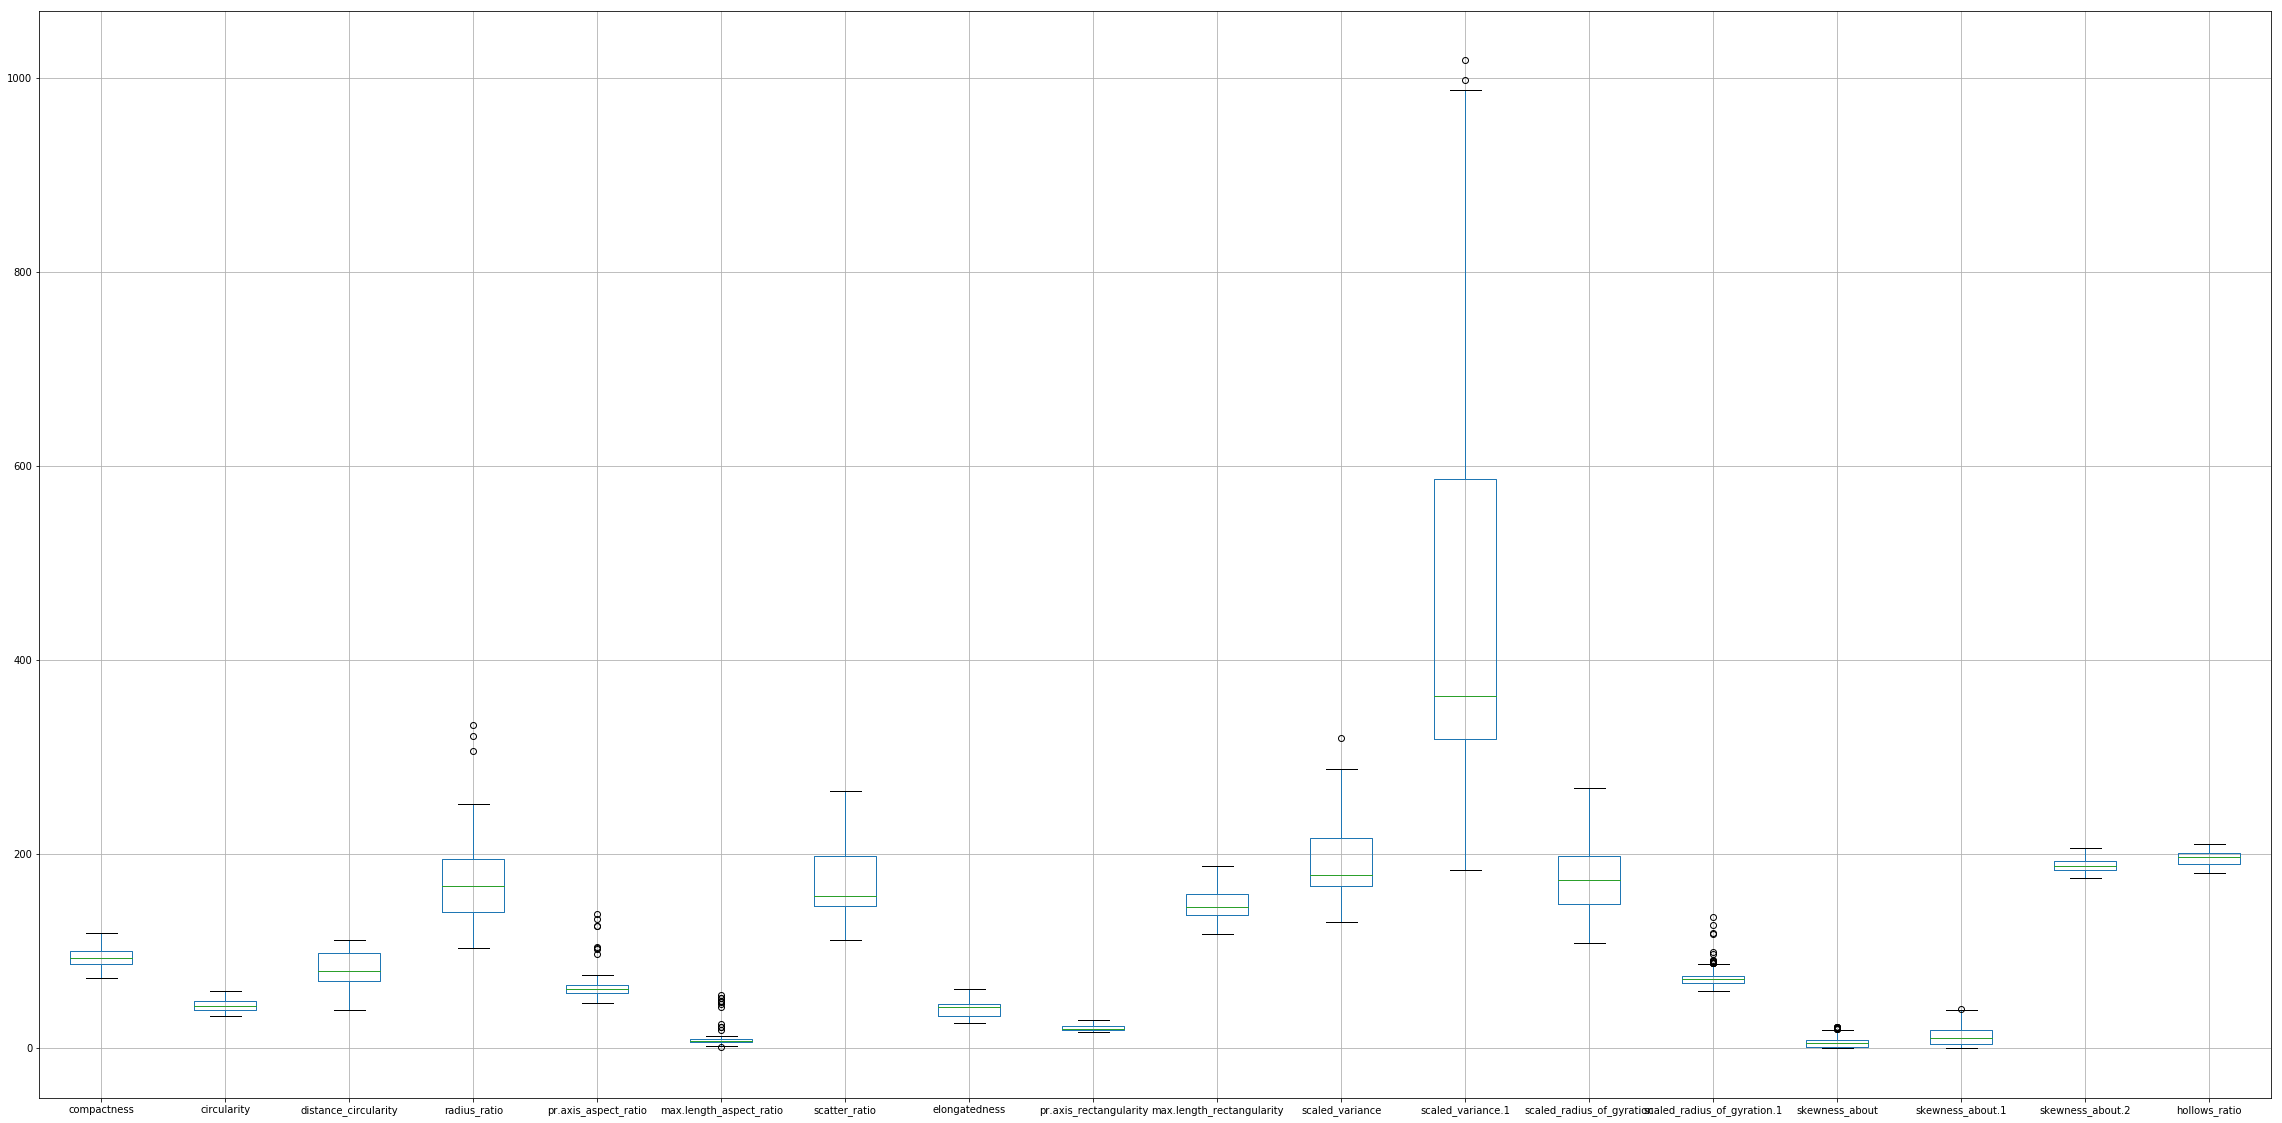

In [225]:
df.boxplot(figsize=(40, 20)) #checking outliers

In [226]:
df.corr() #most of the independent variables are highly correlated to each other.

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

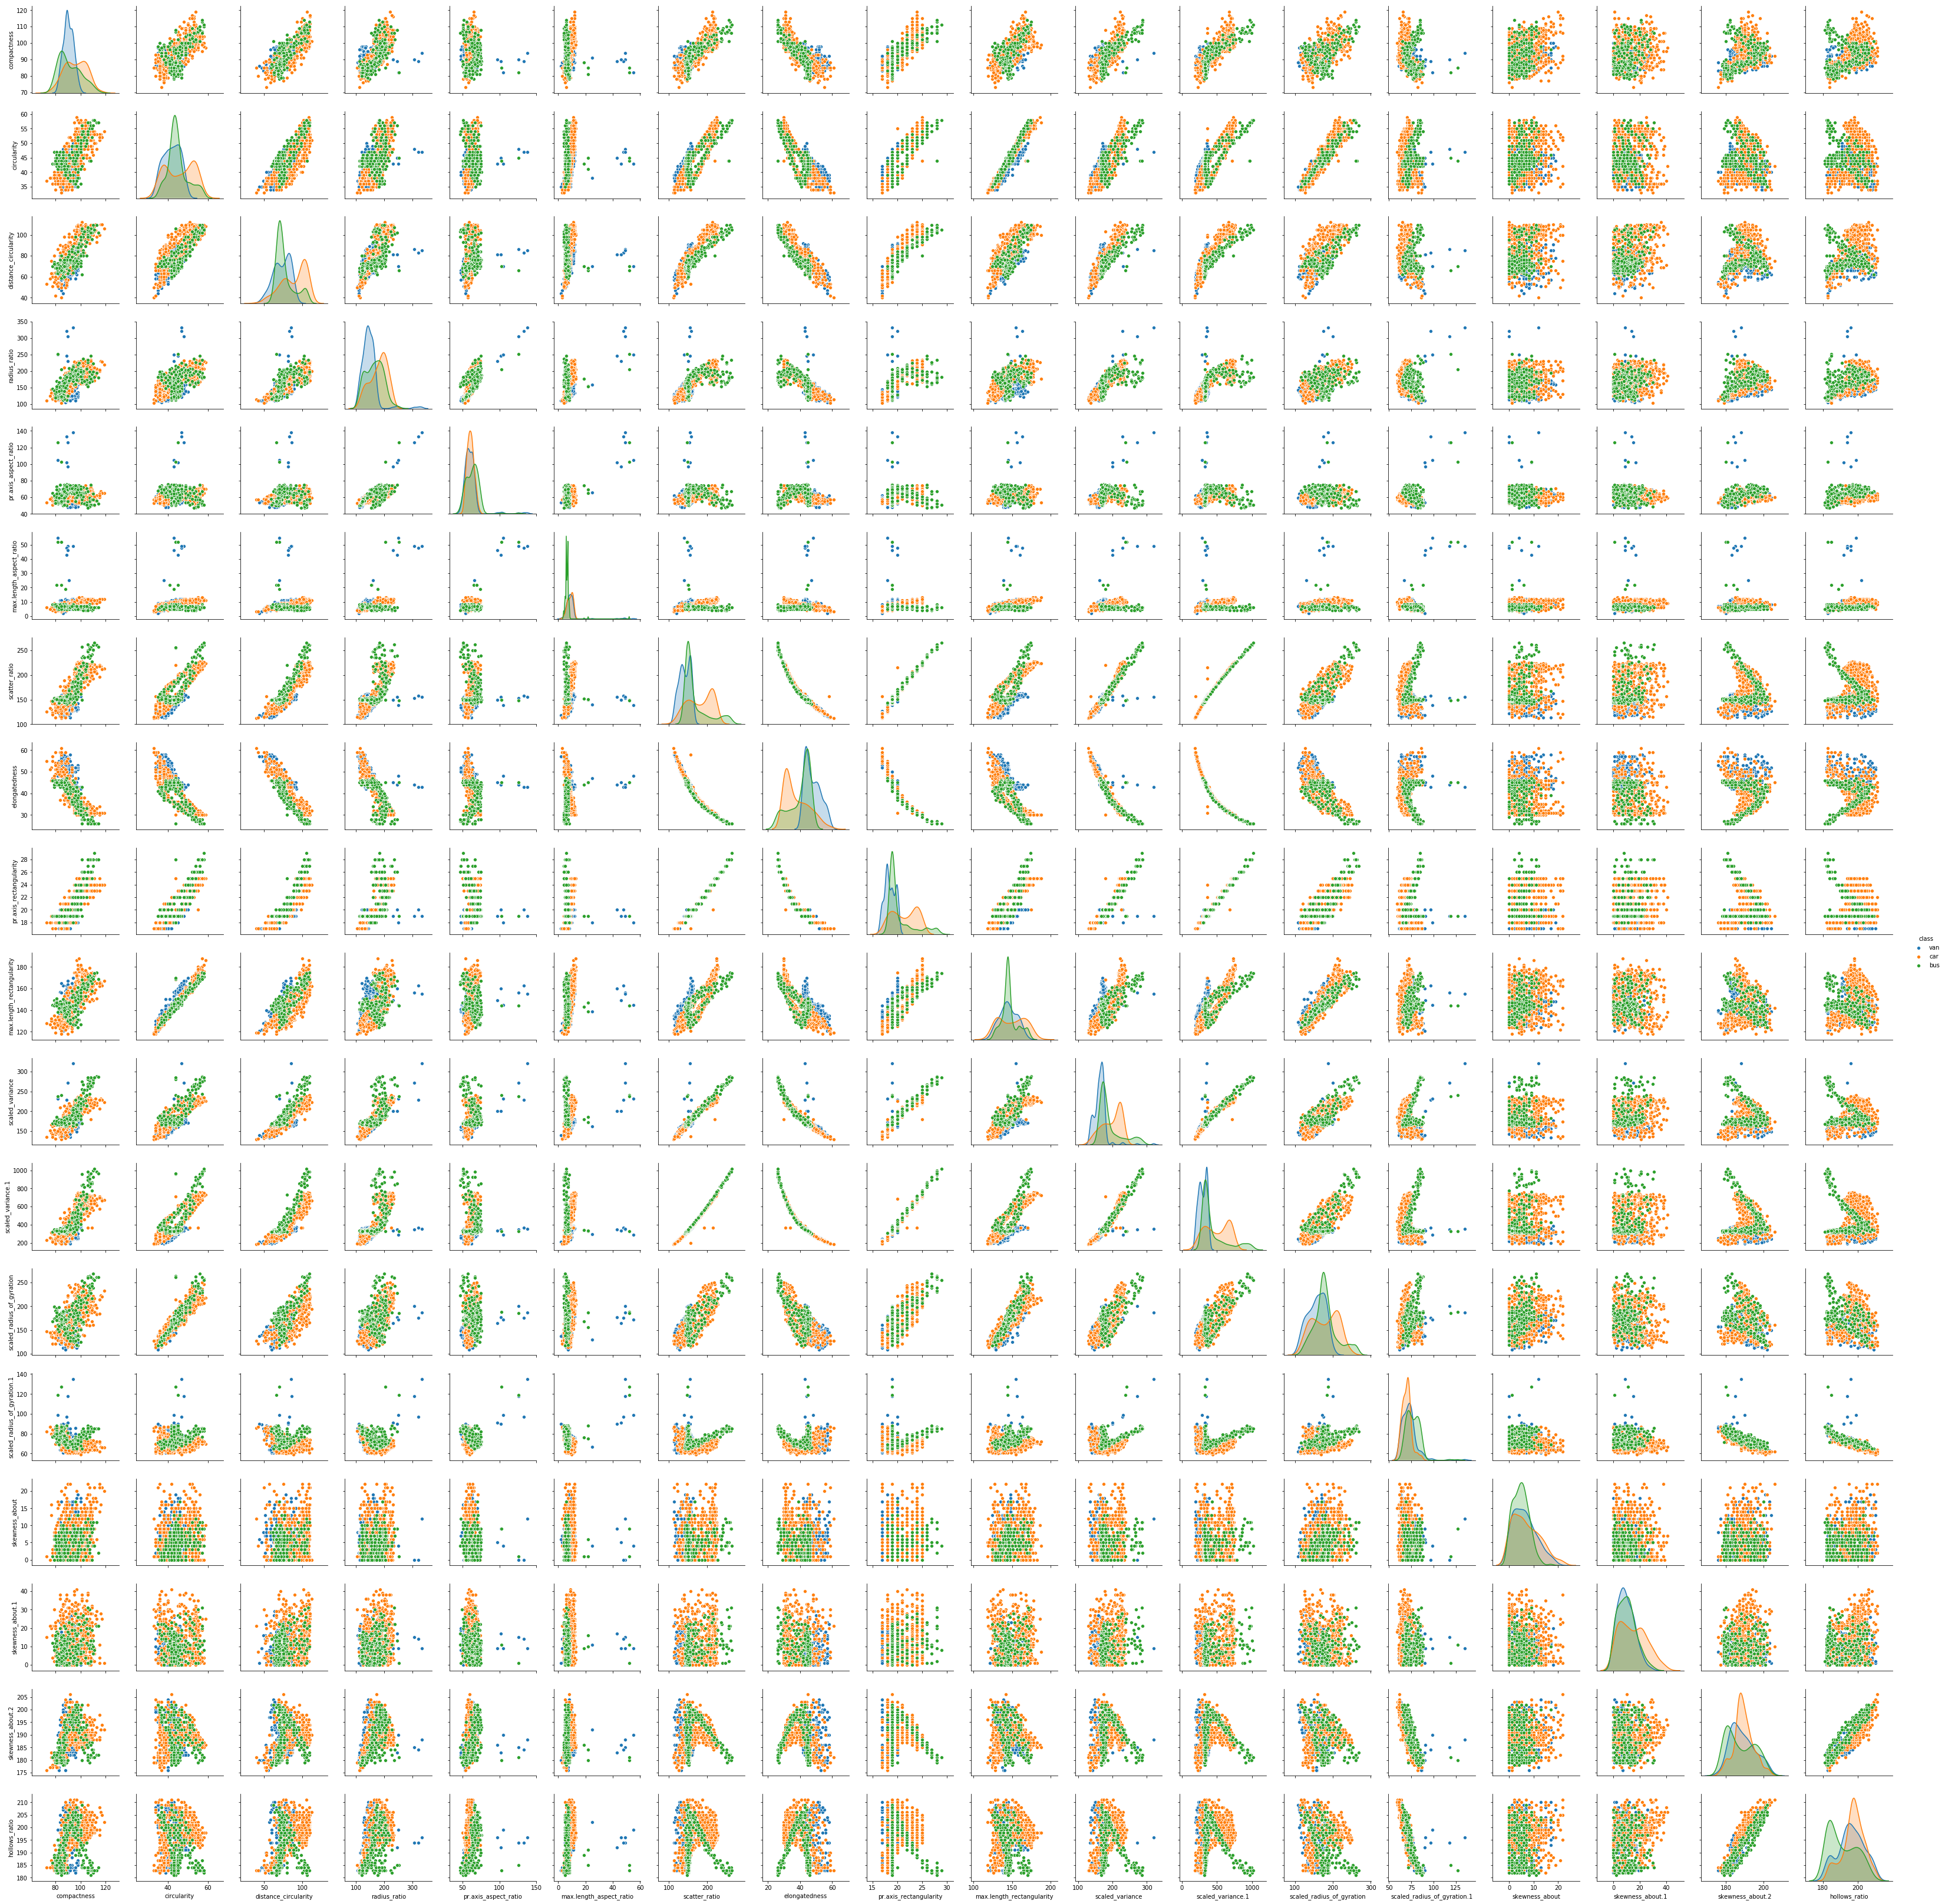

In [227]:
sns.pairplot(df, diag_kind='kde', hue = 'class')

In [228]:
df['class'] = df['class'].astype('category')
df.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

In [229]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df1 = df
df1['class'] = number.fit_transform(df['class'].astype('category'))
df1.sample(10)

compactness  circularity  distance_circularity  radius_ratio  \
390           86         42.0                  65.0         113.0   
488           82         39.0                  86.0         140.0   
482           94         46.0                  79.0         181.0   
406           80         38.0                  64.0         130.0   
748           93         46.0                  85.0         169.0   
443           99         50.0                  88.0         204.0   
527          109         49.0                 103.0         186.0   
326          106         49.0                  96.0         201.0   
499          102         54.0                  98.0         167.0   
373           96         47.0                  77.0         204.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
390                  50.0                        8          152.0   
488                  54.0                        7          153.0   
482                  62.0                        8          167.0   
406                  59.0                        8          134.0   
748                  66.0                        9          151.0   
443                  64.0                       10          185.0   
527                  57.0                       11          206.0   
326                  61.0                       10          181.0   
499                  53.0                       10          217.0   
373                  72.0                        6          167.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
390           45.0                    19.0                        141   
488           45.0                    19.0                        134   
482           40.0                    20.0                        148   
406           51.0                    18.0                        126   
748           44.0                    19.0                        147   
443           35.0                    22.0                        159   
527           32.0                    23.0                        156   
326           36.0                    21.0                        158   
499           31.0                    24.0                        174   
373           38.0                    20.0                        150   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
390            169.0              332.0                      171.0   
488            174.0              338.0                      139.0   
482            190.0              418.0                      193.0   
406            152.0              259.0                      135.0   
748            169.0              339.0                      179.0   
443            209.0              517.0                      193.0   
527            212.0              630.0                      186.0   
326            197.0              494.0                      180.0   
499            228.0              692.0                      223.0   
373            188.0              429.0                      182.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
390                         85.0             4.0              16.0   
488                         71.0            11.0              18.0   
482                         67.0            12.0              15.0   
406                         76.0             1.0              23.0   
748                         67.0             0.0               4.0   
443                         66.0            12.0              11.0   
527                         65.0            12.0              21.0   
326                         62.0            19.0              15.0   
499                         72.0             0.0              31.0   
373                         69.0             6.0              16.0   

     skewness_about.2  hollows_ratio  class  
390             179.0            183      0  
488             183.0            189      1  
4

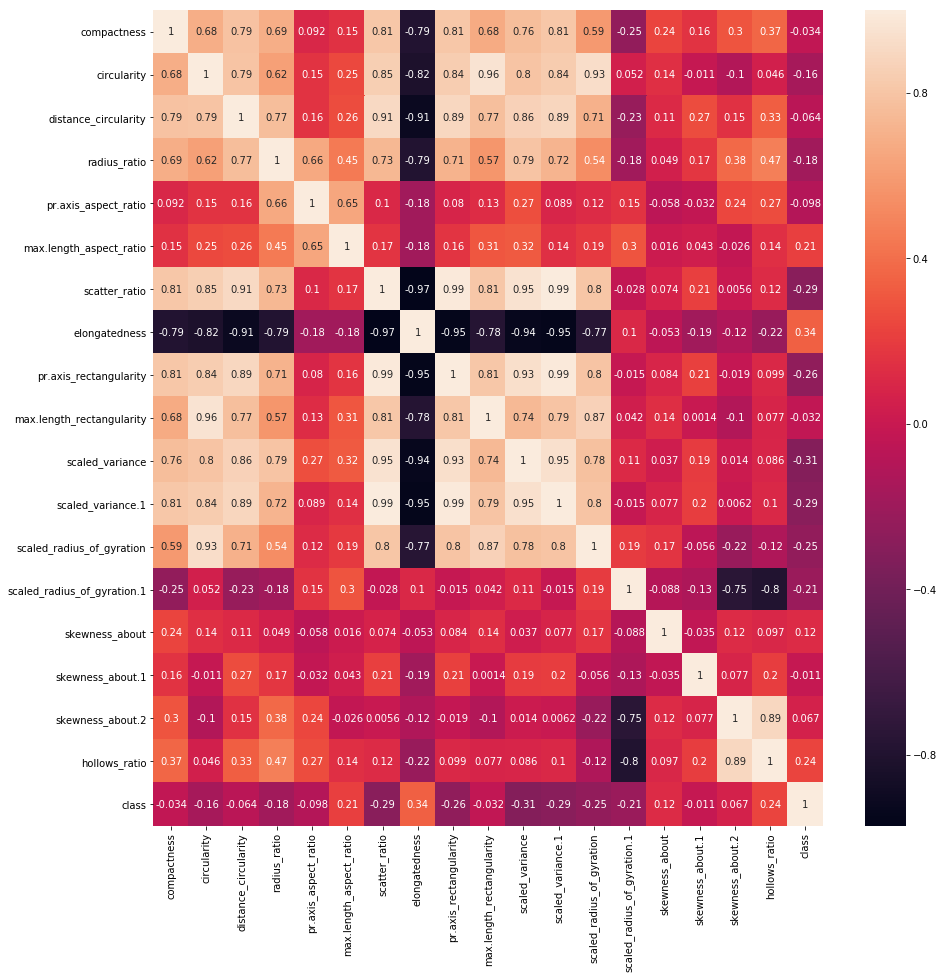

In [230]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(),annot=True, ax =ax)

In [231]:
df.corr() 

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   
class                           -0.182186             -0.098178   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                            

In [232]:
#distance_circularity and scatter_ratio are highly correlated to each other, also distance_circularity and elongatedness are highly correlated to each other
#similarly we can see lot of features having high correlation between each other. This may mean that there is some redundancy in selecting the features. 
#But unlike in Supervised learning, where we have know the outcome to be expected. Here, we do not have an outcome to be expected. Therefore, without knowing what outcome to expect we cannot really manually or observe which features could be important or which could be not.
#therefore, we can use either methods like random forests where we get to know features importances, or use PCA for reduction in the dimentionality. Hence although we can try elimating one of the two features that are highly correlated to each other, we will be not doing it since we do not know the outcome here.

In [233]:
array = df.values
X = array[:,0:18] 
Y = array[:,18] 

In [234]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [235]:
X = sc.fit_transform(X)

In [236]:
X.shape

(846, 18)

In [237]:
Y.shape

(846,)

In [238]:
from sklearn.decomposition import PCA

In [239]:
pca = PCA().fit(X)

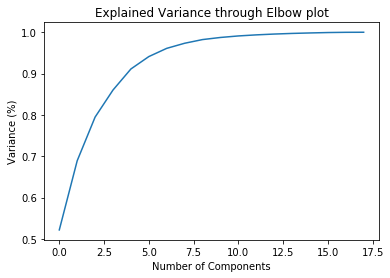

In [240]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance through Elbow plot')
plt.show()

In [241]:
#This elbow plot tells us that selecting 8 components we can preserve something more than 95% of the total variance of the data.

In [242]:
pca = PCA(n_components=8)
dataset = pca.fit_transform(X)

In [243]:
dataset.shape

(846, 8)

In [244]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split( 
                        dataset, Y, 
                test_size = 0.30, random_state = 101)

In [255]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [256]:
param_grid = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf','linear']} 

In [257]:
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 

In [258]:
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5050505050505051, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5076142131979695, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5076142131979695, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ... C=0.01, kernel=linear, score=0.803030303030303, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.7868020304568528, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.7868020304568528, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid th

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [259]:
print(grid.best_params_) 

{'C': 1, 'kernel': 'rbf'}


In [260]:
print(grid.best_estimator_) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [261]:
grid_predictions = grid.predict(X_test) 
accuracy_score(y_test,grid_predictions)

0.9133858267716536

In [262]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95        67
         1.0       0.95      0.90      0.92       129
         2.0       0.79      0.91      0.85        58

   micro avg       0.91      0.91      0.91       254
   macro avg       0.90      0.92      0.91       254
weighted avg       0.92      0.91      0.91       254

[[ 63   1   3]
 [  2 116  11]
 [  0   5  53]]
